In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras 
from keras import utils
from keras.applications import MobileNet
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dropout, Dense
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [2]:
path = "D:\\Projects\\Bone Fracture Classifier\\Dataset\\"

In [3]:
train_data = utils.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40,
)
validation_data = utils.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=42,
)
label = train_data.class_names

Found 1129 files belonging to 10 classes.
Using 1017 files for training.
Found 1129 files belonging to 10 classes.
Using 112 files for validation.


In [4]:
def preprocess(img):
    img = tf.cast(img, "float32") / 255.0
    return img

train_dataset = train_data.map(lambda x, y: (preprocess(x), y))
val_dataset = validation_data.map(lambda x, y: (preprocess(x), y))

In [5]:
x_train = []
y_train = []

for images, labels in train_dataset:
        x_train.append(images.numpy())
        y_train.append(labels.numpy())
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

In [6]:
x_val = []
y_val = []

for images, labels in val_dataset:
    x_val.append(images.numpy())
    y_val.append(labels.numpy())
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

In [7]:
Num_Labels = len(label)
y_train = utils.to_categorical(y_train, Num_Labels)
y_val = utils.to_categorical(y_val, Num_Labels)

In [2]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.6)(x) 
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_86160\556248409.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


In [9]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [10]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=32,
                    shuffle=True,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.1252 - loss: 2.7400 - val_accuracy: 0.1429 - val_loss: 2.4410
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.3090 - loss: 1.9084 - val_accuracy: 0.2143 - val_loss: 2.1567
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.4914 - loss: 1.5192 - val_accuracy: 0.3304 - val_loss: 2.0858
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5741 - loss: 1.2946 - val_accuracy: 0.3929 - val_loss: 1.9655
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6377 - loss: 1.0351 - val_accuracy: 0.3571 - val_loss: 1.8818
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7544 - loss: 0.7436 - val_accuracy: 0.6071 - val_loss: 1.0798
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8086 - loss: 0.5950 - val_accuracy: 0.7321 - val_loss: 0.9465
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8516 - loss: 0.4527 - val_accuracy: 0.7500 - val_loss:

In [11]:
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.9314 - loss: 0.2040
Test Loss: 0.2648921608924866
Test Accuracy: 0.9196428656578064


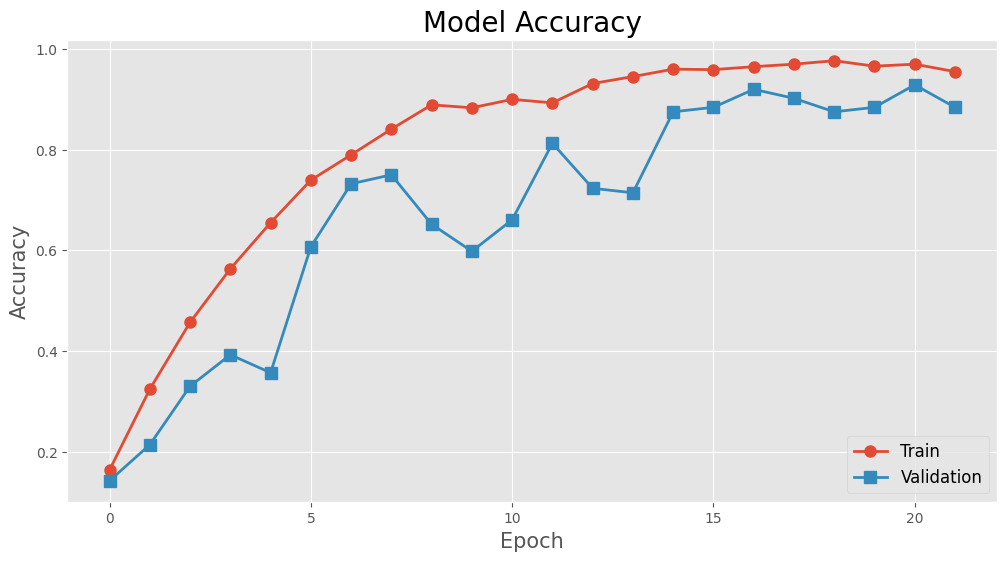

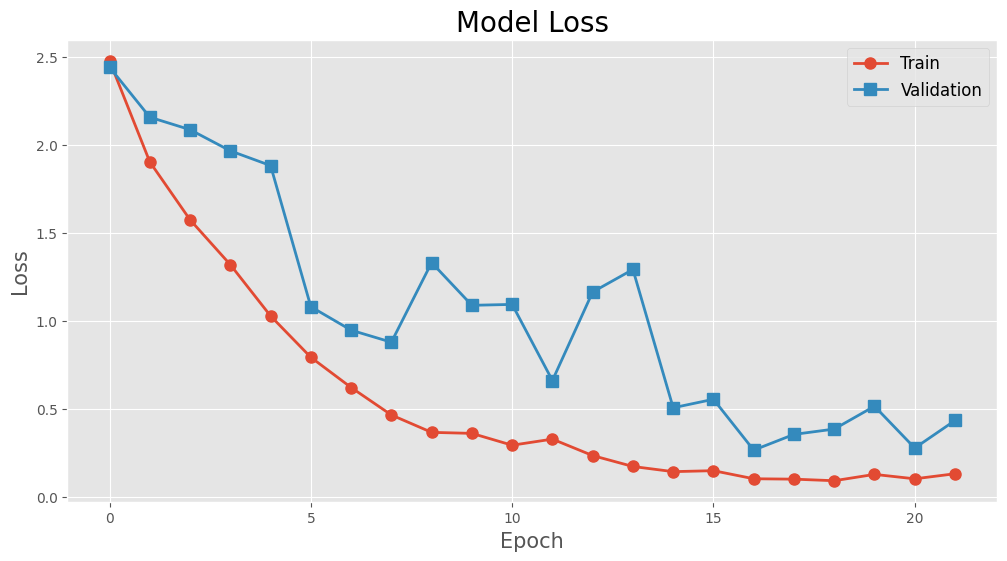

In [12]:
plt.style.use('ggplot')

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], 'o-', linewidth=2, markersize=8, label='Train')
plt.plot(history.history['val_accuracy'], 's-', linewidth=2, markersize=8, label='Validation')
plt.title('Model Accuracy', fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.grid(True)
plt.legend(loc='lower right', fontsize=12)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], 'o-', linewidth=2, markersize=8, label='Train')
plt.plot(history.history['val_loss'], 's-', linewidth=2, markersize=8, label='Validation')
plt.title('Model Loss', fontsize=20)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.grid(True)
plt.legend(loc='upper right', fontsize=12)
plt.show()